In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = Data = pd.read_csv('results.csv', delimiter = ',', encoding='latin-1', header=0)
data.head()

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat
0,172.217.12.170,443,192.168.8.219,55530,6,51,4335,85,85,85.000000,0.000000,1.593452e+09,1.593453e+09,1440.048191,9.012222e-05,30.306676,28.800964,5.879810
1,192.168.8.219,55530,172.217.12.170,443,6,51,2676,52,64,52.470588,2.329293,1.593452e+09,1.593453e+09,1440.048191,7.390976e-05,30.306626,28.800964,5.879813
2,77.234.46.106,80,192.168.8.219,55557,6,66,20066,52,1500,304.030303,474.175807,1.593452e+09,1.593453e+09,1433.032501,1.127720e-04,45.622300,22.046654,21.045142
3,192.168.8.219,55557,77.234.46.106,80,6,62,6468,40,306,104.322581,109.045237,1.593452e+09,1.593453e+09,1433.012500,3.488064e-04,45.611806,23.492008,20.931158
4,192.168.8.219,57580,104.16.122.127,443,6,8,344,40,64,43.000000,7.937254,1.593452e+09,1.593452e+09,91.506789,9.536743e-07,45.224904,13.072398,20.310847


In [24]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [25]:
df = pd.read_csv('results.csv')
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat
0,172.217.12.170,443,192.168.8.219,55530,6,51,4335,85,85,85.000000,0.000000,1.593452e+09,1.593453e+09,1440.048191,9.012222e-05,30.306676,28.800964,5.879810
1,192.168.8.219,55530,172.217.12.170,443,6,51,2676,52,64,52.470588,2.329293,1.593452e+09,1.593453e+09,1440.048191,7.390976e-05,30.306626,28.800964,5.879813
2,77.234.46.106,80,192.168.8.219,55557,6,66,20066,52,1500,304.030303,474.175807,1.593452e+09,1.593453e+09,1433.032501,1.127720e-04,45.622300,22.046654,21.045142
3,192.168.8.219,55557,77.234.46.106,80,6,62,6468,40,306,104.322581,109.045237,1.593452e+09,1.593453e+09,1433.012500,3.488064e-04,45.611806,23.492008,20.931158
4,192.168.8.219,57580,104.16.122.127,443,6,8,344,40,64,43.000000,7.937254,1.593452e+09,1.593452e+09,91.506789,9.536743e-07,45.224904,13.072398,20.310847


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   src_ip           577 non-null    object 
 1   src_port         577 non-null    int64  
 2   dst_ip           577 non-null    object 
 3   dst_port         577 non-null    int64  
 4   proto            577 non-null    int64  
 5   pktTotalCount    577 non-null    int64  
 6   octetTotalCount  577 non-null    int64  
 7   min_ps           577 non-null    int64  
 8   max_ps           577 non-null    int64  
 9   avg_ps           577 non-null    float64
 10  std_dev_ps       577 non-null    float64
 11  flowStart        577 non-null    float64
 12  flowEnd          577 non-null    float64
 13  flowDuration     577 non-null    float64
 14  min_piat         577 non-null    float64
 15  max_piat         577 non-null    float64
 16  avg_piat         577 non-null    float64
 17  std_dev_piat    

In [27]:
x = df.iloc[:,[3,4]].values

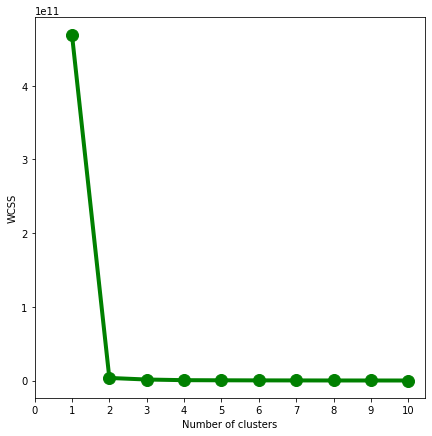

In [28]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

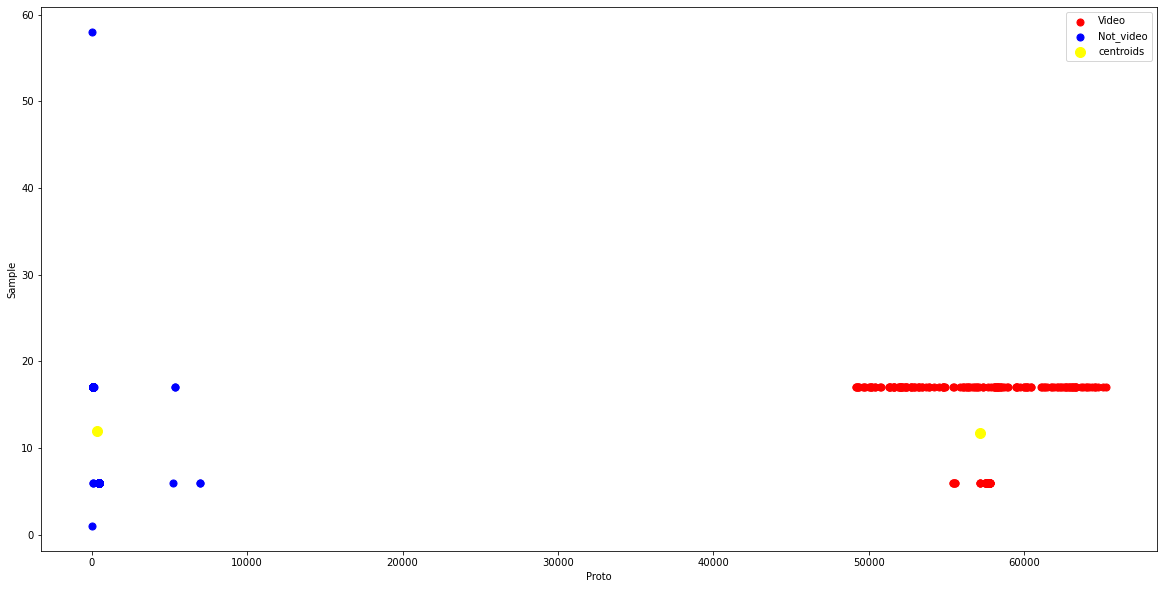

In [30]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'red', label = "Video")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "Not_video")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Proto")
plt.ylabel("Sample")
plt.legend()
plt.show()

In [31]:
x = df[['src_port','proto','flowDuration']].values

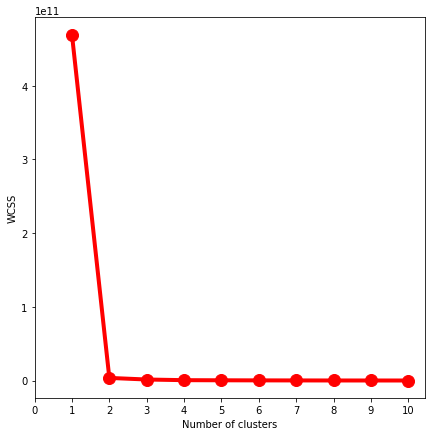

In [32]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [33]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

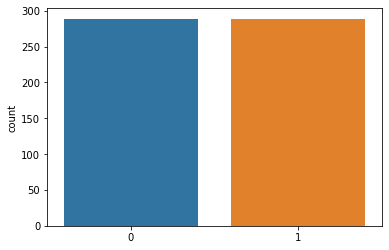

In [34]:
sns.countplot(y_clusters)

In [35]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

80.0
6.0
1433.0325009822845


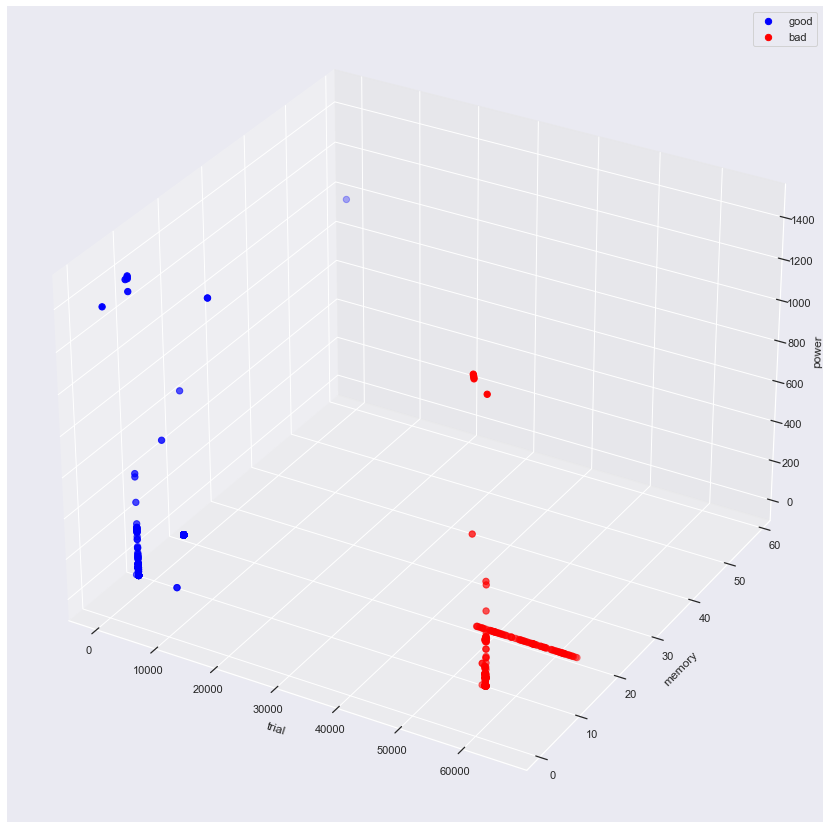

In [55]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "good")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'red', label = "bad")
ax.set_xlabel('trial')
ax.set_ylabel('memory')
ax.set_zlabel('power')
ax.legend()
plt.show()

with open('file.txt') as f:
    line = f.readline()
    process(line)

import os
size_in_bytes = os.path.getsize('file.txt')



In [37]:
labels = model.labels_

In [38]:
print(labels)

[0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0
 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1
 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0
 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0
 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1
 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0
 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 0 

In [39]:
df = pd.read_csv("results.csv")

In [40]:
df["new_column"] = labels

In [41]:
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat,new_column
0,172.217.12.170,443,192.168.8.219,55530,6,51,4335,85,85,85.000000,0.000000,1.593452e+09,1.593453e+09,1440.048191,9.012222e-05,30.306676,28.800964,5.879810,0
1,192.168.8.219,55530,172.217.12.170,443,6,51,2676,52,64,52.470588,2.329293,1.593452e+09,1.593453e+09,1440.048191,7.390976e-05,30.306626,28.800964,5.879813,1
2,77.234.46.106,80,192.168.8.219,55557,6,66,20066,52,1500,304.030303,474.175807,1.593452e+09,1.593453e+09,1433.032501,1.127720e-04,45.622300,22.046654,21.045142,0
3,192.168.8.219,55557,77.234.46.106,80,6,62,6468,40,306,104.322581,109.045237,1.593452e+09,1.593453e+09,1433.012500,3.488064e-04,45.611806,23.492008,20.931158,1
4,192.168.8.219,57580,104.16.122.127,443,6,8,344,40,64,43.000000,7.937254,1.593452e+09,1.593452e+09,91.506789,9.536743e-07,45.224904,13.072398,20.310847,1


In [44]:

predicted_labels = model.labels_
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, predicted_labels)

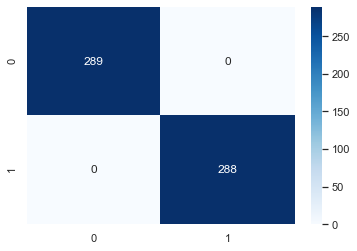

In [45]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [49]:
import scipy
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

In [50]:
def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = scipy.optimize.linear_sum_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

In [53]:
from sklearn.metrics.classification import accuracy_score

accuracy_score(labels, predicted_labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



1.0